In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import ml_utility as util
from math import sqrt

# Mutiple Linear Regression

In [4]:
df = pd.read_csv("housing.csv")

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**handling num values**

In [43]:
df.fillna(0, inplace=True)

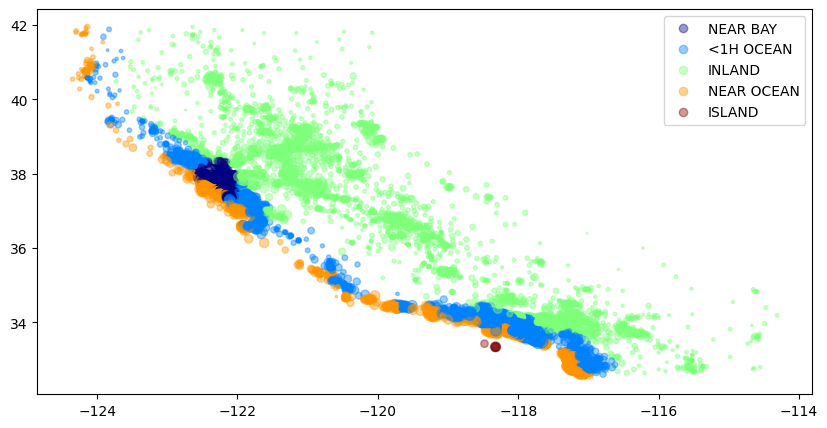

In [40]:
fig, axes = plt.subplots(figsize=(10,5))

proximity, index =  df.ocean_proximity.factorize()

scatter =  axes.scatter(df.longitude, df.latitude, c=proximity, alpha=0.4, cmap='jet', s=df.median_house_value/10000)

element, _ = scatter.legend_elements()


plt.legend(element, index)

plt.show()

In [12]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [19]:
arr.reshape(-1,1).shape

(20640, 1)

In [13]:
df[df.ocean_proximity ==  "ISLAND"]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8317,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND
8318,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND


In [41]:
reg = LinearRegression()

In [44]:
data_x = df.drop(columns=["median_house_value","ocean_proximity"])
data_y = df["median_house_value"]

In [45]:
data_x.shape

(20640, 8)

In [46]:
data_y.shape

(20640,)

In [47]:
data_y = util.series_reshape((-1,1), data_y)[0]

In [48]:
data_y.shape

(20640, 1)

In [49]:
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.3)

In [50]:
train_x.shape

(14448, 8)

In [53]:
test_x.shape

(6192, 8)

In [54]:
reg.fit(train_x, train_y)

LinearRegression()

In [55]:
reg.coef_

array([[-4.17279535e+04, -4.20126288e+04,  1.12366208e+03,
        -5.29459809e+00,  6.33358473e+01, -4.22631456e+01,
         9.61758759e+01,  3.97717908e+04]])

In [57]:
pd.DataFrame({"Fetatures":train_x.columns, "Importance": reg.coef_[0]})

,Fetatures,Importance
0,longitude,-41727.953530
1,latitude,-42012.628847
2,housing_median_age,1123.662077
3,total_rooms,-5.294598
4,total_bedrooms,63.335847
5,population,-42.263146
6,households,96.175876
7,median_income,39771.790820


In [61]:
df.iloc[9732]

longitude               -121.69
latitude                  36.81
housing_median_age         18.0
total_rooms              2837.0
total_bedrooms            522.0
population               1454.0
households                458.0
median_income            4.5272
median_house_value     221000.0
ocean_proximity       <1H OCEAN
Name: 9732, dtype: object

In [67]:
reg.predict(test_x)

array([[252801.82758785],
       [236086.34582671],
       [283485.95779899],
       ...,
       [176702.84552637],
       [271932.63757531],
       [170755.31160823]])

In [68]:
test_resutl= test_x.copy()

In [70]:
test_resutl["predicted_price"] = reg.predict(test_x)

In [72]:
test_resutl['original_price'] = test_y

In [74]:
test_resutl.predicted_price.std()

92328.43412272456

In [75]:
test_resutl.original_price.std()

114440.07795984134

<BarContainer object of 1 artists>

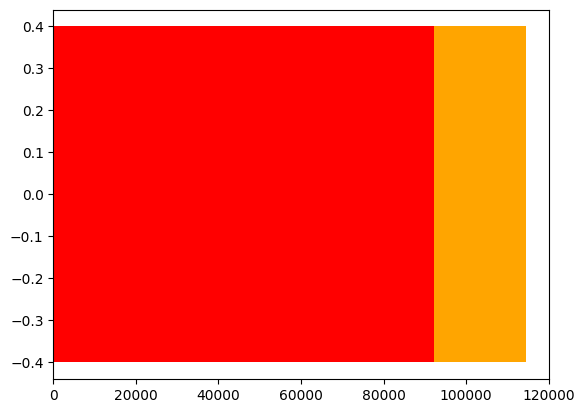

In [82]:
plt.barh(0,test_resutl.original_price.std(), color='orange')
plt.barh(0,test_resutl.predicted_price.std(), color='red')

In [84]:
r2 = r2_score(test_resutl.original_price, test_resutl.predicted_price)

In [85]:
r2

0.626366270154824

In [86]:
mse = mean_squared_error(test_resutl.original_price, test_resutl.predicted_price)
mae = mean_absolute_error(test_resutl.original_price, test_resutl.predicted_price)

In [88]:
print("r2_score: ", r2)
print("mse: ", mse)
print("rmse: ", sqrt(mse))
print("mae: ", mae)


r2_score:  0.626366270154824
mse:  4892515628.673218
rmse:  69946.519775277
mae:  51277.9861550274


In [90]:
test_resutl.predicted_price.std()/test_resutl.original_price.std()

0.80678408970609